In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Age = 나이
Attrition = 퇴직여부
BusinessTravel = 출장빈도
DailyRate = 일당
Department = 부서
DistanceFromHome = 통근거리
Education = 학력
EducationField = 전공
EmployeeCount = 직원 수
EmployeeNumber = 직원번호
RelationshipSatisfaction = 동료와의 관계 만족도
StandardHours = 표준 근로 시간
StockOptionLevel = 스톡옵션 부여 수준
TotalWorkingYears = 총 경력기간
TrainingTimesLastYear = 작년 교육훈련 횟수
WorkLifeBalance = 워라밸 (일과 삶의 균형 만족도)
YearsAtCompany = 현 직장 근속 연수
YearsInCurrentRole = 현 직무 근속 연수
YearsSinceLastPromotion = 마지막 승진 이후 경과 연수
YearsWithCurrManager = 현재 상사(사수)와 함께 일한 기간

In [6]:
attrition_count = data['Attrition'].value_counts()
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100

print("퇴직 여부")
print(attrition_count)
print("\n퇴직 여부 비율")
print(attrition_rate)

퇴직 여부
Attrition
No     1233
Yes     237
Name: count, dtype: int64

퇴직 여부 비율
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


### '출장 빈도'

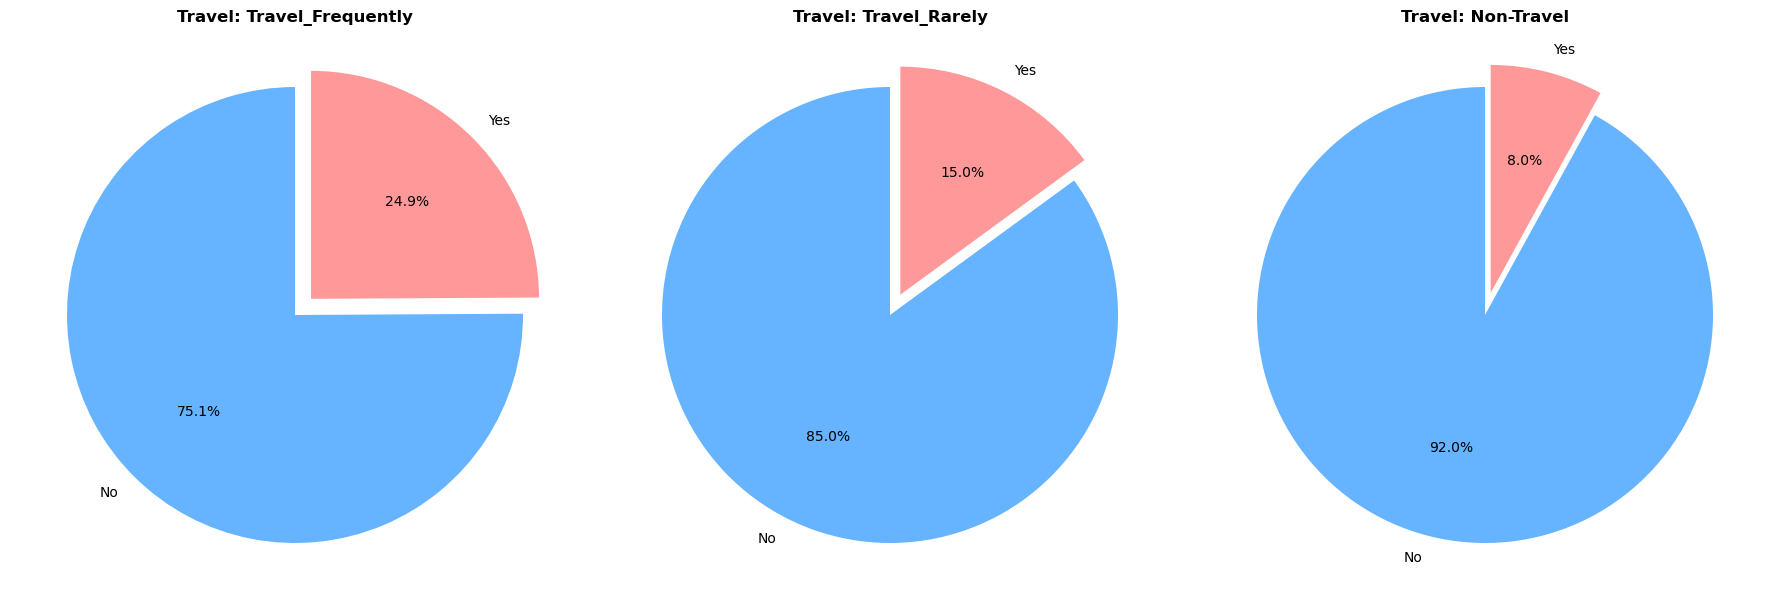

In [ ]:
travel_attrition_rates = data.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_travel = travel_attrition_rates.sort_values(by='Yes', ascending=False).index


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for i, travel in enumerate(sorted_travel):
    travel_data = data[data['BusinessTravel'] == travel]['Attrition'].value_counts()
    travel_data = travel_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        travel_data, 
        labels=travel_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0, 0.1]
    )
    axes[i].set_title(f'Travel: {travel}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 출장 빈도에 따른 퇴직율
**출장 빈도가 높을수록 퇴직율이 높으며, 출장 빈도가 높은 사람과 출장을 가지 않는 사람보다 퇴사율이 3배이상 높다.**

### '야근 여부'

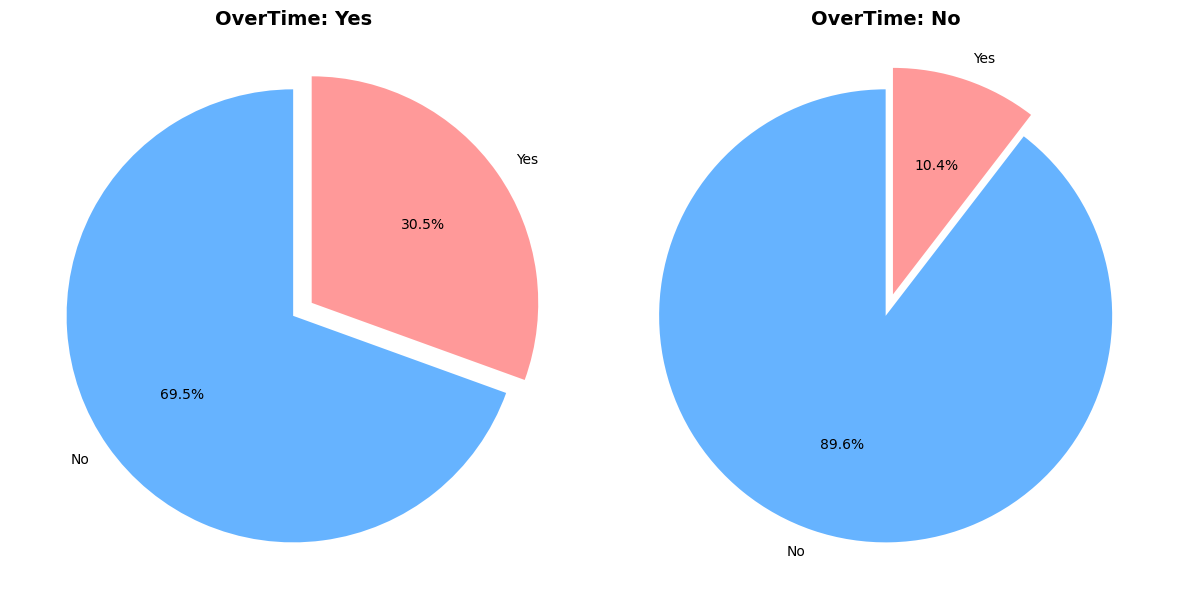

In [ ]:
ot_attrition_rates = data.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_ot = ot_attrition_rates.sort_values(by='Yes', ascending=False).index


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()


for i, ot_status in enumerate(sorted_ot):
    ot_data = data[data['OverTime'] == ot_status]['Attrition'].value_counts()
    ot_data = ot_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        ot_data, 
        labels=ot_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0, 0.1]
    )
    axes[i].set_title(f'OverTime: {ot_status}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 야근여부에 따른 퇴직율
**야근을 하는 사람이 야근을 하지 않는사람보다 퇴직율이 약 3배정도 높다.**

### '환경 만족도'

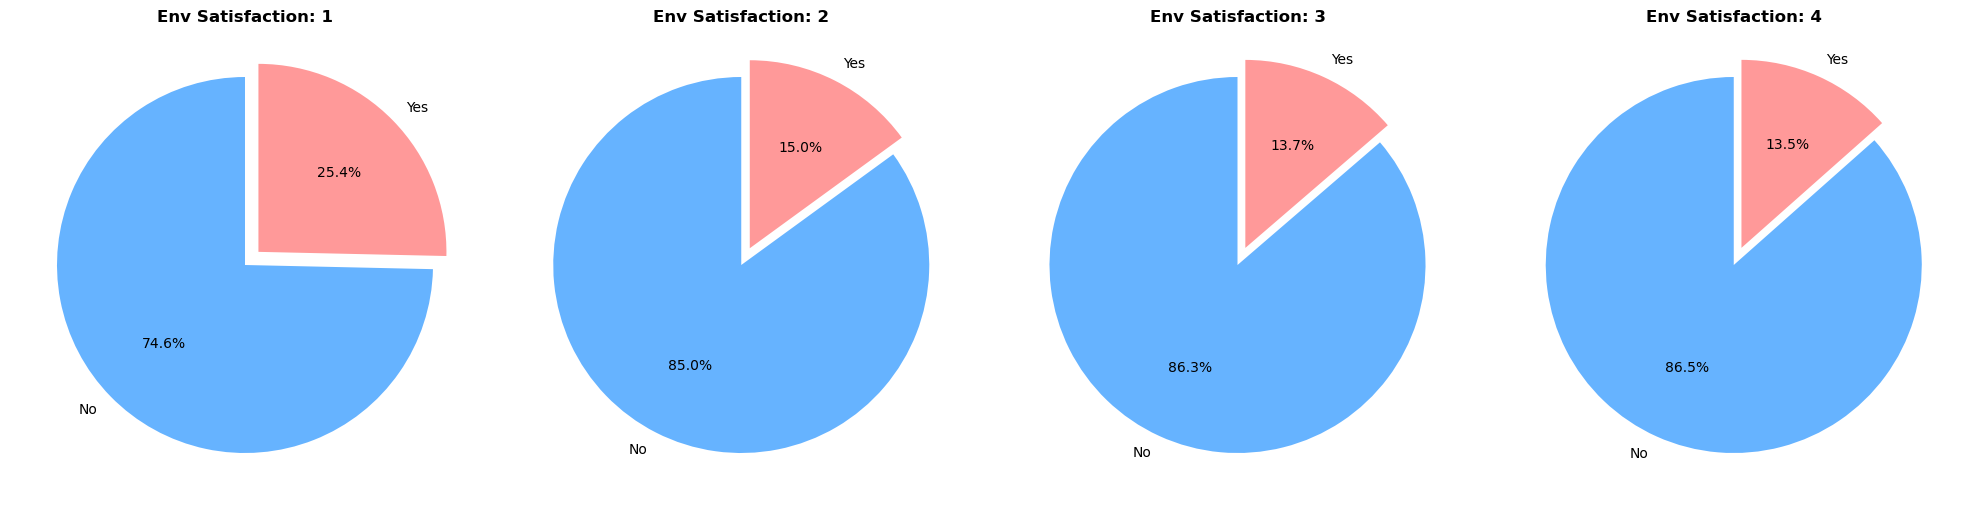

In [ ]:
env_attrition_rates = data.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_env = env_attrition_rates.sort_values(by='Yes', ascending=False).index


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()


for i, level in enumerate(sorted_env):
    env_data = data[data['EnvironmentSatisfaction'] == level]['Attrition'].value_counts()
    env_data = env_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        env_data, 
        labels=env_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0, 0.1]
    )
    axes[i].set_title(f'Env Satisfaction: {level}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 환경 만족도에 따른 퇴직율
**환경만족도가 높을수록 퇴직율이 낮아지긴 하지만 일정 만족도 이상부터는 눈에 띌 정도로 차이가 나지 않는다.**

## '직무 몰입도'

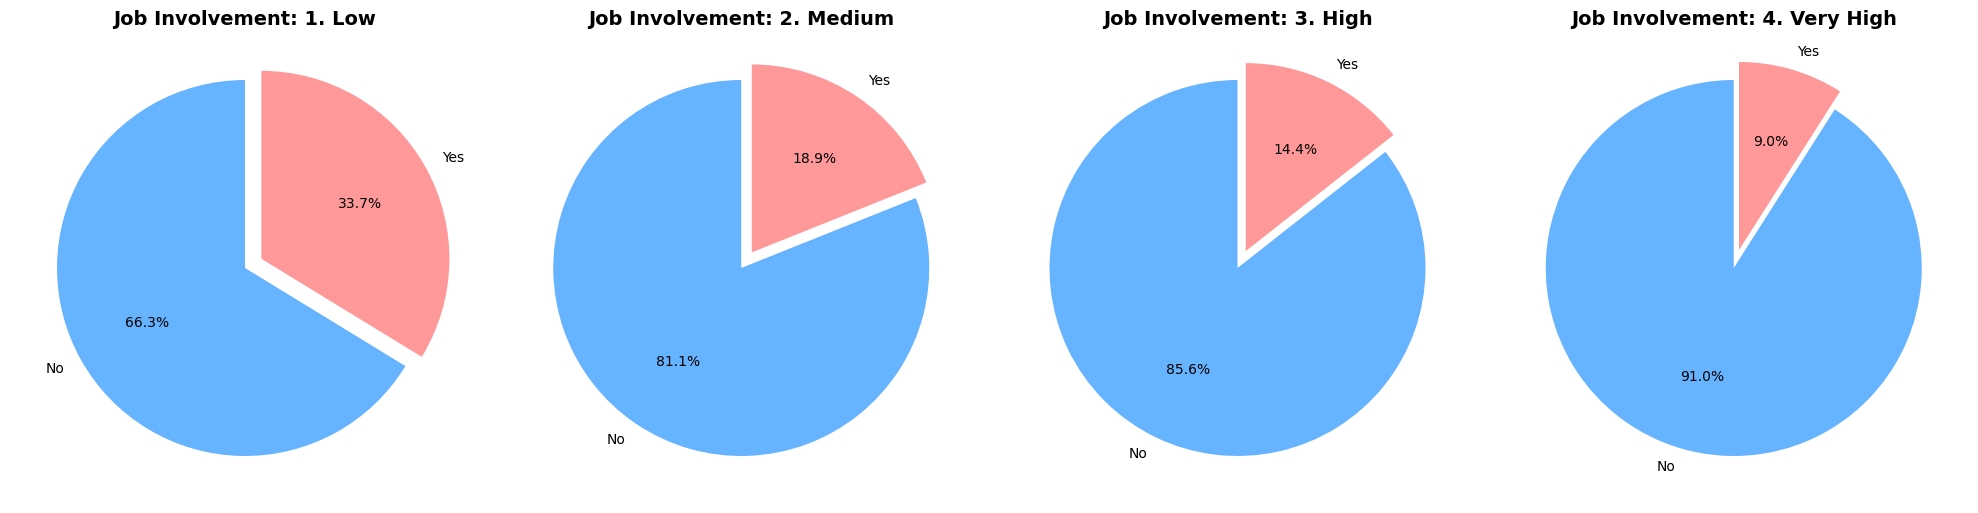

In [12]:
ji_attrition_rates = data.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_ji = [1, 2, 3, 4] 


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()


for i, lavel in enumerate(sorted_ji):
    ji_data = data[data['JobInvolvement'] == lavel]['Attrition'].value_counts()
    ji_data = ji_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        ji_data, 
        labels=ji_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'], 
        explode=[0, 0.1] 
    )
    
   
    titles = {1: '1. Low', 2: '2. Medium', 3: '3. High', 4: '4. Very High'}
    axes[i].set_title(f'Job Involvement: {titles[lavel]}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 직업 몰입도에 따른 퇴직율

## '워라밸'

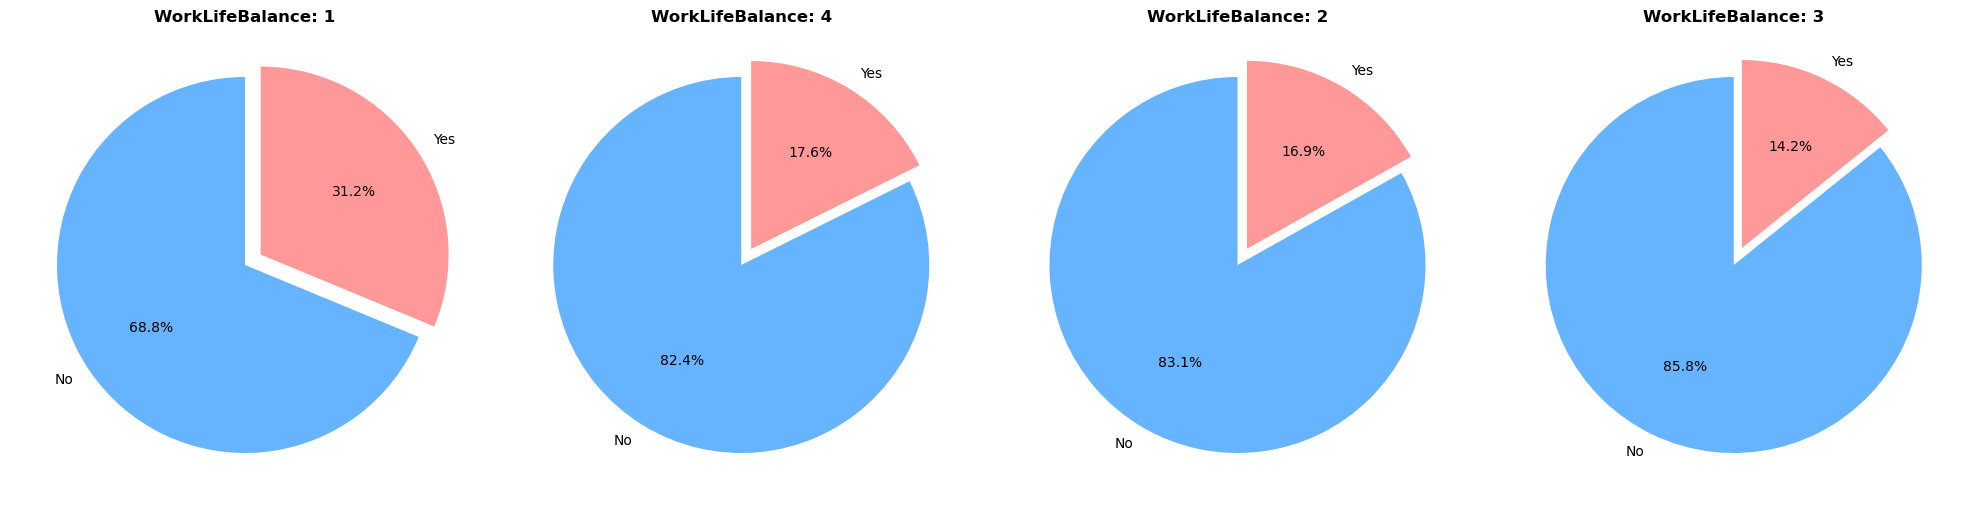

In [ ]:
wlb_attrition_rates = data.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_wlb = wlb_attrition_rates.sort_values(by='Yes', ascending=False).index


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()

for i, level in enumerate(sorted_wlb):
    wlb_data = data[data['WorkLifeBalance'] == level]['Attrition'].value_counts()
    wlb_data = wlb_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        wlb_data, 
        labels=wlb_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0, 0.1]
    )
    axes[i].set_title(f'WorkLifeBalance: {level}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()